## Visualisation des incendies sur une carte
Ce notebook a pour but de montrer la répartition des incendies dans le quart Sud-Est de la France.  
Pour cela nous avons utilisé la bibliothèque **geopandas** qui permet de tracer des cartes via **matplotlib**.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Charger les données des communes du Sud-Est de la France
# Assurez-vous d'adapter le chemin du fichier à votre environnement
communes = gpd.read_file(r'C:\Users\felix\Desktop\ensae-prog2A\data\georef-france-commune.geojson')

# Charger vos données d'incendies sous forme de dataframe pandas
df_incendies_2018 = pd.read_csv(r'C:\Users\felix\Desktop\ensae-prog2A\data\Incendies_18.csv', sep = ";")
#Charger les données géojson des régions 
regions = gpd.read_file(r'C:\Users\felix\Desktop\ensae-prog2A\data\regions.geojson')
#Charger les données géojson des forêts :
forets = gpd.read_file(r'C:\Users\felix\Desktop\ensae-prog2A\data\FOR_PUBL_FR.json')

In [3]:
communes.reg_name = communes.reg_name.apply(lambda x : x[0])
communes.reg_name.unique()

array(['Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', 'Normandie',
       'Grand Est', 'Bretagne', 'Hauts-de-France',
       'Bourgogne-Franche-Comté', "Provence-Alpes-Côte d'Azur",
       'Auvergne-Rhône-Alpes', 'Centre-Val de Loire', 'Corse',
       'Île-de-France', 'Guadeloupe', 'Guyane', 'La Réunion',
       'Terres australes et antarctiques françaises', 'Martinique',
       'Saint-Barthélemy', 'Saint-Pierre-et-Miquelon', 'Mayotte',
       'Wallis et Futuna', 'Saint-Martin', 'Île de Clipperton'],
      dtype=object)

In [4]:
regions_metropole = ['Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', 'Normandie',
       'Grand Est', 'Bretagne', 'Hauts-de-France',
       'Bourgogne-Franche-Comté', "Provence-Alpes-Côte d'Azur",
       'Auvergne-Rhône-Alpes', 'Centre-Val de Loire', 'Corse',
       'Île-de-France']
communes_metropole = communes[communes.reg_name.isin(regions_metropole)]
communes_metropole.com_code = communes_metropole.com_code.apply(lambda x : x[0])


C:\Users\felix\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Grouper par commune et compter le nombre d'incendies pour chaque commune
nombre_incendies = df_incendies_2018.groupby('Code INSEE').size().reset_index(name='Nombre_incendies')

# Merge entre le dataframe des incendies et les données géographiques des communes

merged_data = pd.merge(communes_metropole, nombre_incendies, how='left', left_on='com_code', right_on = 'Code INSEE')

# Remplacer les valeurs NaN par 0 si une commune n'a pas eu d'incendies
merged_data['Nombre_incendies'] = merged_data['Nombre_incendies'].fillna(0)




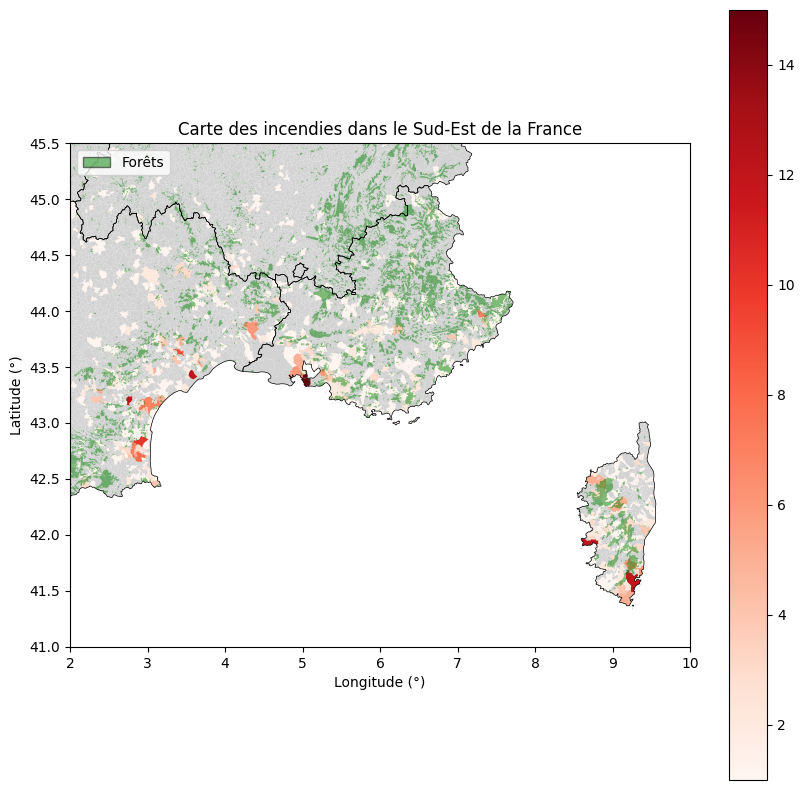

In [26]:
from matplotlib.patches import Patch
# Créer une carte
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Coordonnées approximatives du Sud-Est de la France pour le zoom
minx, miny, maxx, maxy = 2, 41, 10, 45.5  # Coordonnées approximatives pour le Sud-Est de la France

# Afficher les limites des communes du Sud-Est de la France
communes_metropole.plot(ax=ax, color='lightgrey')
# Afficher les contours des régions françaises
regions.boundary.plot(ax=ax, color='black', linewidth=0.5)
# Afficher les données des incendies sur la carte
merged_data[merged_data['Nombre_incendies'] > 0].plot(ax=ax, column='Nombre_incendies', legend=True, cmap='Reds')

# Afficher les données des forêts sur la carte
forets.plot(ax=ax, color='green', alpha=0.5)
# Définir les limites de la carte pour zoomer sur le Sud-Est de la France
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Créer une légende pour les forêts
legend_elements = [Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Forêts')]
ax.legend(handles=legend_elements, loc='upper left')

# Titres des axes x et y
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')

plt.title('Carte des incendies dans le Sud-Est de la France')

plt.show()